# Load Packages

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestNeighbors

# Data Loading & Overview
- Load the dataset
- Understand structure, data types, and completeness

In [80]:
file = "dataset.csv"
df = pd.read_csv(file)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [81]:
print(len(df))
print(df['track_id'].nunique())

114000
89741


In [82]:
print(df.info())
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [83]:
### show NA rows in specific column
# df[df['artists'].isna()]
### show NA rows in any column
# df[df.isna().any(axis=1)]

# Data Cleaning
- Drop duplicates: df_cleaned
- Handle missing values: df_cleaned
- Split the artists into multiple rows: df_exploded

## Drop duplicates
Based on our findings, the dataset contains 114,000 rows with 89,741 unique track IDs, resulting in 24,259 duplicates — a duplication rate of 21.28%, primarily due to the presence of multiple **track_genre** entries and **popularity** per track.

### Process

Step1: Check if there're duplicates

In [70]:
duplicate_track_ids = df['track_id'].duplicated().sum()
total_track_ids = df['track_id'].shape[0]
unique_track_ids = df['track_id'].nunique()
unique_track_ids_showonce = df['track_id'].value_counts().eq(1).sum()

print(f"Number of duplicate track_id entries: {duplicate_track_ids}")
print(f"Total number of track_id entries: {total_track_ids}")
print(f"Number of unique track_id entries: {unique_track_ids}")
print(f"Number of unique track_id entries show once: {unique_track_ids_showonce}")
print(f"Percentage duplicated: {duplicate_track_ids / total_track_ids:.2%}")

### Preview duplicate rows
# df[df['track_id'].duplicated(keep=False)].sort_values('track_id')

Number of duplicate track_id entries: 24259
Total number of track_id entries: 114000
Number of unique track_id entries: 89741
Number of unique track_id entries show once: 73100
Percentage duplicated: 21.28%


Step2: Identify duplicated track_ids

In [71]:
df_duplicates = df[df['track_id'].duplicated(keep=False)]
df_duplicates.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic


Step3: Check which columns differ across the duplicates

In [72]:
diff_summary = df_duplicates.groupby('track_id').nunique()

varing_cols = diff_summary.loc[:, (diff_summary > 1).any()]
print("These columns differ across the duplicates:")
print(varying_cols.columns.tolist())

These columns differ across the duplicates:
['Unnamed: 0', 'popularity', 'track_genre']


In [73]:
popularity_counts = df.groupby('track_id')['popularity'].nunique()
track_ids_with_popularity_duplicates = popularity_counts[popularity_counts > 1]
rows_with_popularity_duplicates = df[df['track_id'].isin(track_ids_with_popularity_duplicates.index)]

print(f"Number of rows where track_id has different popularity values: {rows_with_popularity_duplicates.shape[0]}")
print(f"Number of affected track_ids: {track_ids_with_popularity_duplicates.shape[0]}")

# rows_with_popularity_duplicates.sort_values('track_id').head(10)

Number of rows where track_id has different popularity values: 1932
Number of affected track_ids: 720


In [74]:
track_genre_counts = df.groupby('track_id')['track_genre'].nunique()
track_ids_with_track_genre_duplicates = track_genre_counts[track_genre_counts > 1]
rows_with_track_genre_duplicates = df[df['track_id'].isin(track_ids_with_track_genre_duplicates.index)]

print(f"Number of rows where track_id has different track_genre values: {rows_with_track_genre_duplicates.shape[0]}")
print(f"Number of affected track_ids: {track_ids_with_track_genre_duplicates.shape[0]}")

# rows_with_track_genre_duplicates.sort_values('track_id').head(10)

Number of rows where track_id has different track_genre values: 40210
Number of affected track_ids: 16299


### Result

In [177]:
# columns_to_check = df.columns[1:]
df.drop_duplicates(subset='track_id', inplace=True)
df_cleaned = df

In [178]:
print(len(df_cleaned))
print(df_cleaned['track_id'].nunique())

89740
89740


In [190]:
df_genre = df[~df.duplicated(subset=columns_to_check, keep='first')].reset_index(drop=True)

## Handle missing values
Only one column has NA in artists, album_name, track_name, we can directly remove it

### Process

In [179]:
print(df_cleaned.isna().sum())

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [180]:
df_cleaned[df_cleaned.isna().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


### Result

In [181]:
df_cleaned.dropna(inplace=True)

In [182]:
print(len(df_cleaned))
print(df_cleaned['track_id'].nunique())

89740
89740


## Split the artists into multiple rows

In [110]:
df_cleaned['artists'] = df_cleaned['artists'].str.split(';')
df_exploded = df_cleaned.explode('artists').reset_index(drop=True)

In [111]:
print(len(df_exploded))
print(df_exploded['track_id'].nunique())

157530
89740


# Exploratory Data Analysis (EDA)

## A. Popularity Distribution

Text(0.5, 1.0, 'Distribution of Track Popularity')

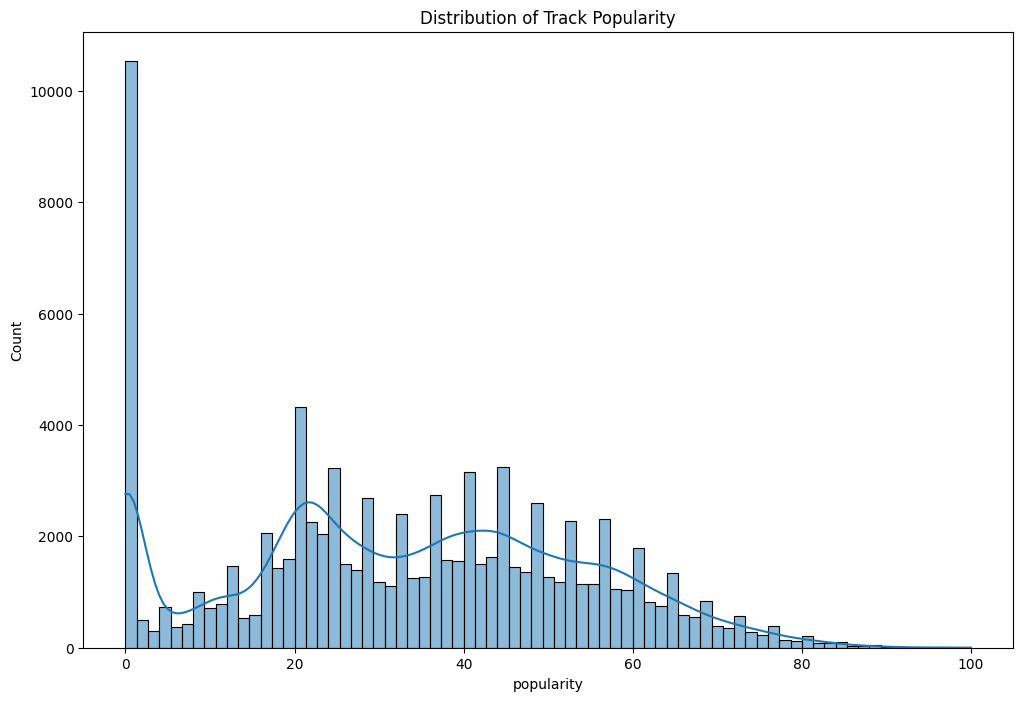

In [202]:
plt.figure(figsize=(12, 8))
sns.histplot(df_cleaned['popularity'], kde=True)
plt.title("Distribution of Track Popularity")

## B. Genre Distribution

In [191]:
df_genre['track_genre'].nunique()

113

In [192]:
genre_summary = (
    df_genre.groupby('track_genre')
      .agg(unique_tracks=('track_id', 'nunique'),
           avg_popularity=('popularity', 'mean'))
      .reset_index()
      .sort_values('unique_tracks', ascending=False)
)

In [193]:
genre_summary

,track_genre,unique_tracks,avg_popularity
0,acoustic,1000,42.483000
1,afrobeat,999,24.407407
2,alt-rock,999,33.896897
4,ambient,999,44.208208
12,cantopop,999,34.753754
...,...,...,...
71,metal,232,56.422414
85,punk,226,41.884956
53,house,210,32.090476
56,indie,134,34.350746


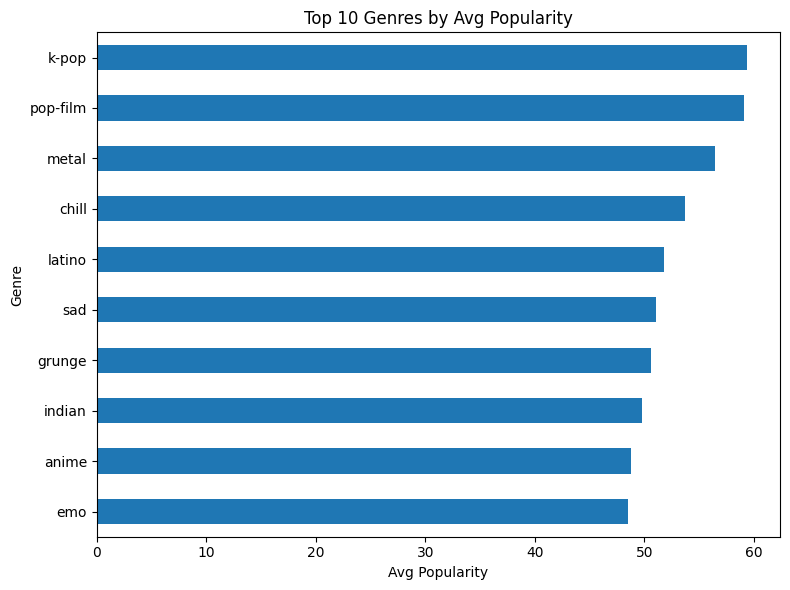

In [194]:
top20_by_avg_popularity = genre_summary.sort_values('avg_popularity', ascending=False).head(10)

top20_by_avg_popularity.plot(
    kind='barh',
    x='track_genre',
    y='avg_popularity',
    figsize=(8, 6),
    legend=False
)
plt.title("Top 10 Genres by Avg Popularity")
plt.xlabel("Avg Popularity")
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## C. Correlation Heatmap

In [197]:
feature_cols = ['danceability', 'energy','loudness', 'speechiness','acousticness','instrumentalness','liveness','valence', 'tempo']

<Axes: >

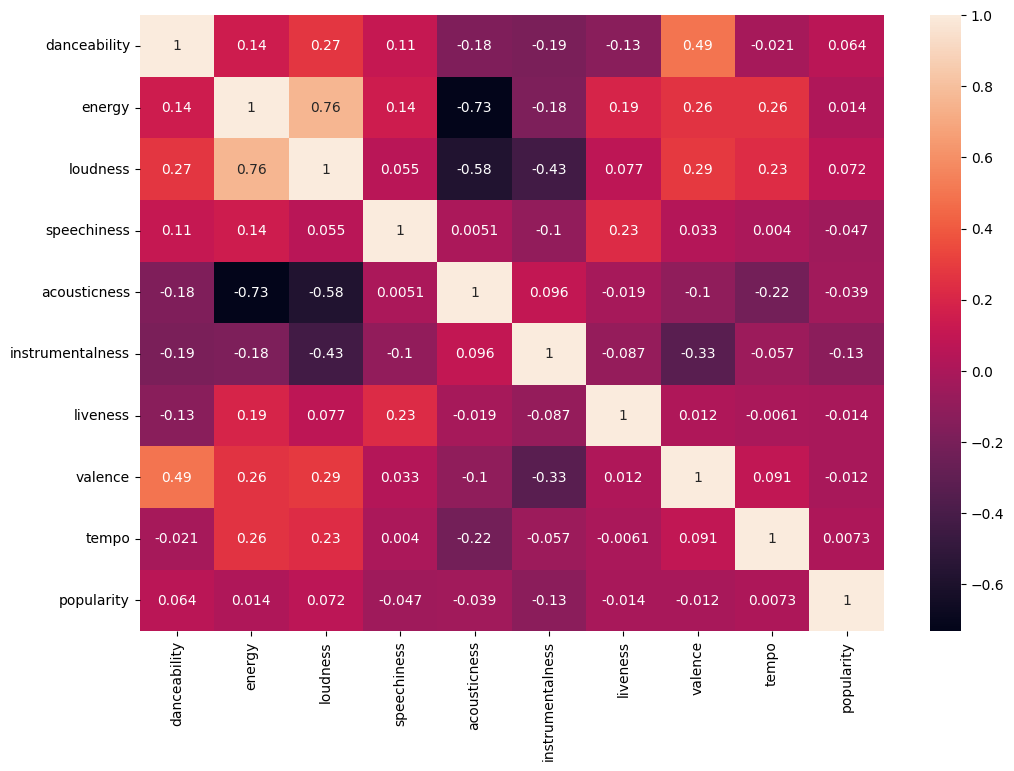

In [198]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[feature_cols + ['popularity']].corr(), annot=True)

# Recommendation System
**Goal: Recommend tracks based on user-input audio preferences**


Use feature_cols = ['danceability', 'energy','loudness', 'speechiness','acousticness','instrumentalness','liveness','valence', 'tempo'] to define the recommendations. Set n_neighbors=5 so that we can have more diverse recommendations

Step1: Feature Normalization

In [199]:
scaler = StandardScaler()
df_cleaned_scaled = df_cleaned.copy()
df_cleaned_scaled[feature_cols] = scaler.fit_transform(df_cleaned[feature_cols])

Step2: Get Recommendations

In [201]:
# Example: High energy, medium speechiness, low acousticness
user_input_raw = [[0.8, 0.9, -5.0, 0.1, 0.1, 0.0, 0.2, 0.9, 130]]
user_input_scaled = scaler.transform(user_input_raw)

knn = NearestNeighbors(n_neighbors=5).fit(df_cleaned_scaled[feature_cols])
_, indices = knn.kneighbors(user_input_scaled)

# Show recommendations
df_cleaned.iloc[indices[0]][['track_name', 'artists', 'track_genre', 'popularity']]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



,track_name,artists,track_genre,popularity
80145,Thaar Maar Thakkar Maar,Thaman S;Shreya Ghoshal;Chiranjeevi;Salman Khan,pop-film,66
67742,Mujer Latina,Thalia,latin,0
55429,Tukur Tukur,Pritam;Arijit Singh;Neha Kakkar;Kanika Kapoor;...,indian,52
1692,The Plan,The Poets Of Rhythm,afrobeat,18
37830,Mega Funk Sento E Me Acabo,DJ Ghost Floripa,funk,43


# Genre Classfication
**Goal: Predict genre using audio features**



Step1: Prepare data

In [203]:
X = df_cleaned[feature_cols]
y = df_cleaned['track_genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Step2: Train Model

In [204]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

         acoustic       0.18      0.21      0.19       200
         afrobeat       0.25      0.21      0.23       200
         alt-rock       0.31      0.27      0.29       200
      alternative       0.58      0.47      0.52        81
          ambient       0.28      0.26      0.27       200
            anime       0.32      0.19      0.24       199
      black-metal       0.34      0.45      0.39       199
        bluegrass       0.26      0.40      0.31       200
            blues       0.55      0.35      0.43       188
           brazil       0.11      0.07      0.09       187
        breakbeat       0.26      0.28      0.27       199
          british       0.27      0.14      0.19       180
         cantopop       0.17      0.27      0.21       200
    chicago-house       0.35      0.47      0.40       200
         children       0.32      0.31      0.31       195
            chill       0.21      0.23      0.22       

In [206]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()
df_report

,precision,recall,f1-score,support
acoustic,0.177686,0.215000,0.194570,200.000000
afrobeat,0.248521,0.210000,0.227642,200.000000
alt-rock,0.309942,0.265000,0.285714,200.000000
alternative,0.575758,0.469136,0.517007,81.000000
ambient,0.282609,0.260000,0.270833,200.000000
...,...,...,...,...
turkish,0.134021,0.074713,0.095941,174.000000
world-music,0.254296,0.400000,0.310924,185.000000
accuracy,0.318197,0.318197,0.318197,0.318197
macro avg,0.321990,0.304847,0.302355,17948.000000


Step3: Feature Importance

Text(0.5, 1.0, 'Feature Importance in Genre Classification')

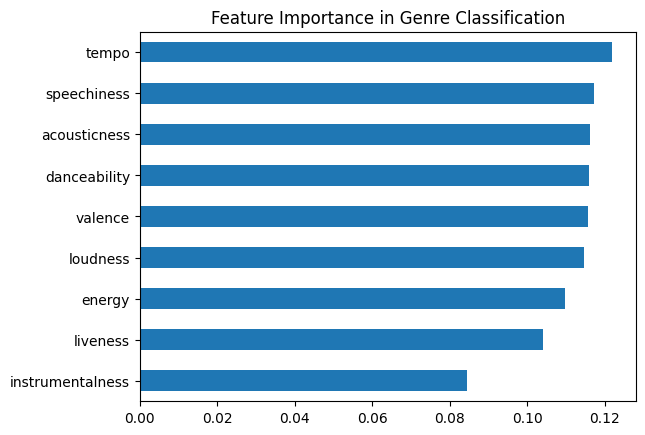

In [159]:
importances = pd.Series(clf.feature_importances_, index=feature_cols)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance in Genre Classification")

# Emerging Track & Artist Identification
**Goal: Surface high-potential tracks and rising artists**

Step1: Define Emerging Criteria

In [165]:
df_emerging = df_cleaned[(df_cleaned['popularity'] >= 40) & (df_cleaned['popularity'] <= 70)]
df_emerging['emerging_score'] = (
    df_emerging['danceability'] +
    df_emerging['energy'] +
    df_emerging['valence'] +
    df_emerging['tempo'] / 200 -
    df_emerging['loudness'] / 60
)

/tmp/ipython-input-165-1501312431.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Step2: Output the top 10 "most promising tracks"

In [166]:
df_emerging.sort_values('emerging_score', ascending=False).head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,main_artist,emerging_score
27260,27400,2Q9F3D53QeclwbsY24cuxO,"[M-Beat, General Levy]",Knowledge,Incredible,56,269866,False,0.807,0.903,...,0.1130,0.211,0.000003,0.0565,0.940,165.034,4,drum-and-bass,M-Beat,3.660003
35011,35166,6OsMu5ntYteQzcCrZVWA33,[Os Barões Da Pisadinha],Agora Eu Pego Mesmo,Agora Eu Pego Mesmo,46,155637,False,0.815,0.887,...,0.0459,0.592,0.000141,0.0978,0.952,172.032,4,forro,Os Barões Da Pisadinha,3.620593
35214,35369,5vX4ObqJnFO7N6SOX8r5Kt,[Os Barões Da Pisadinha],Agora Eu Pego Mesmo,Desce do Cavalo,43,116480,False,0.765,0.929,...,0.0647,0.554,0.000001,0.1330,0.969,167.968,4,forro,Os Barões Da Pisadinha,3.613940
35264,35419,5ML1UZX5jvk9R0QivABet4,[Os Barões Da Pisadinha],As Melhores 2018,DNA Do Interior,42,163996,False,0.830,0.860,...,0.0522,0.461,0.000000,0.0698,0.963,172.009,4,forro,Os Barões Da Pisadinha,3.610928
87222,87564,505rTU8E2KdQEhzJKyuOaE,[Charlie Brown Jr.],"Ritmo, Ritual E Responsa",Direto E Reto Sempre,43,166840,False,0.741,0.894,...,0.0955,0.330,0.000149,0.1090,0.964,175.132,4,r-n-b,Charlie Brown Jr.,3.602127
47176,47380,505rTU8E2KdQEhzJKyuOaE,[Charlie Brown Jr.],"Ritmo, Ritual E Responsa",Direto E Reto Sempre,43,166840,False,0.741,0.894,...,0.0955,0.330,0.000149,0.1090,0.964,175.132,4,hard-rock,Charlie Brown Jr.,3.602127
35045,35200,6nWPzkaAjRdjAGSFhpGc3O,[Os Barões Da Pisadinha],Batom de Ouro,Já Que Me Ensinou a Beber,45,158432,False,0.792,0.867,...,0.0783,0.415,0.000012,0.0493,0.975,171.956,4,forro,Os Barões Da Pisadinha,3.596413
111188,111636,6yoqKyNAJOjTlFnDM8u6Ka,[Boozoo Bajou],Satta,Night over Manaus,49,379360,False,0.839,0.951,...,0.0486,0.055,0.850000,0.2670,0.933,143.016,4,trip-hop,Boozoo Bajou,3.590097
34947,35102,5u9K9HcGTIdRkbexpyGk7Y,[Os Barões Da Pisadinha],Agora Eu Pego Mesmo,Quem Me Dera,46,136097,False,0.792,0.851,...,0.0581,0.559,0.000000,0.0425,0.974,171.852,4,forro,Os Barões Da Pisadinha,3.580310
14407,14426,5qtlopq4SnnvVeiQVt3M0n,"[""Puppy Dog Pals"" Cast]",Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,60,57789,False,0.781,0.936,...,0.2020,0.171,0.001410,0.2020,0.873,182.148,4,children,"""Puppy Dog Pals"" Cast",3.579223


Step3: Output the top 10 "most promising artists"

Text(0.5, 1.0, 'Top Emerging Artists')

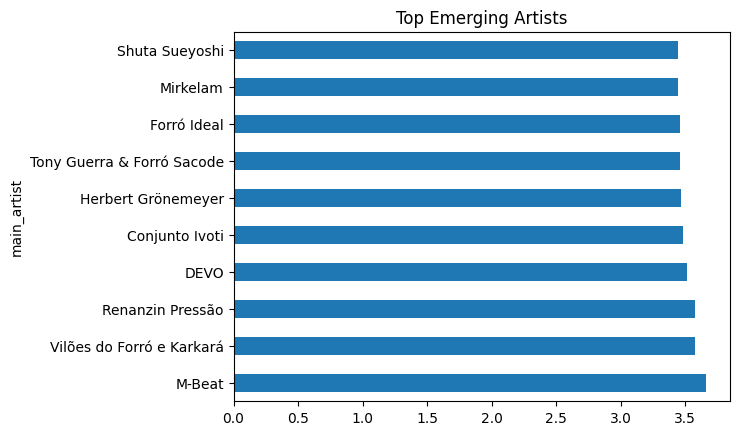

In [164]:
emerging_artists = df_emerging.groupby('main_artist')['emerging_score'].mean().sort_values(ascending=False).head(10)
emerging_artists.plot(kind='barh')
plt.title("Top Emerging Artists")

# Popularity Drivers by Genre
**Goal: What drives popularity across genres?**

In [207]:
coef_table = []

for genre in df_cleaned['track_genre'].unique():
    temp = df_cleaned[df_cleaned['track_genre'] == genre]
    if len(temp) > 30:
        X = temp[feature_cols]
        y = temp['popularity']
        model = LinearRegression().fit(X, y)
        for i, f in enumerate(feature_cols):
            coef_table.append({
                'genre': genre,
                'feature': f,
                'coefficient': model.coef_[i]
            })

coef_df = pd.DataFrame(coef_table)

Text(0.5, 1.0, 'Impact of Valence on Popularity by Genre')

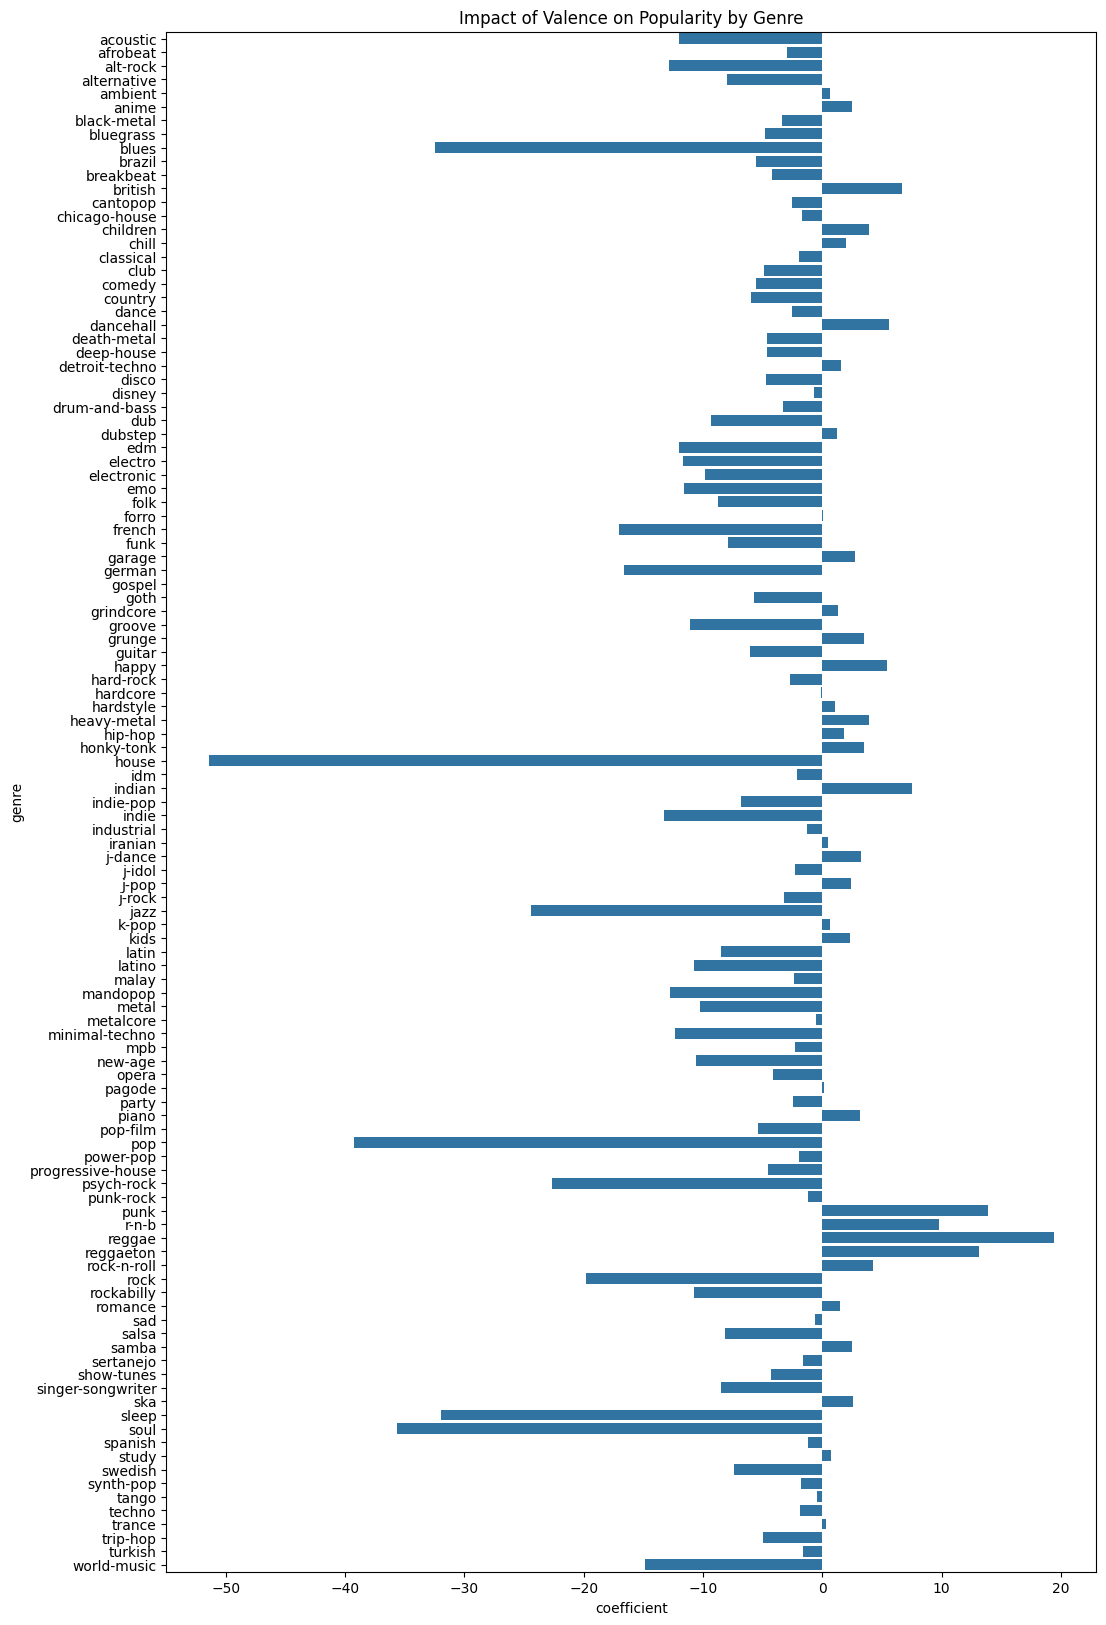

In [208]:
plt.figure(figsize=(12, 20))
sns.barplot(data=coef_df[coef_df['feature']=='valence'], x='coefficient', y='genre')
plt.title("Impact of Valence on Popularity by Genre")

Text(0.5, 1.0, 'Impact of Valence on Popularity by Genre')

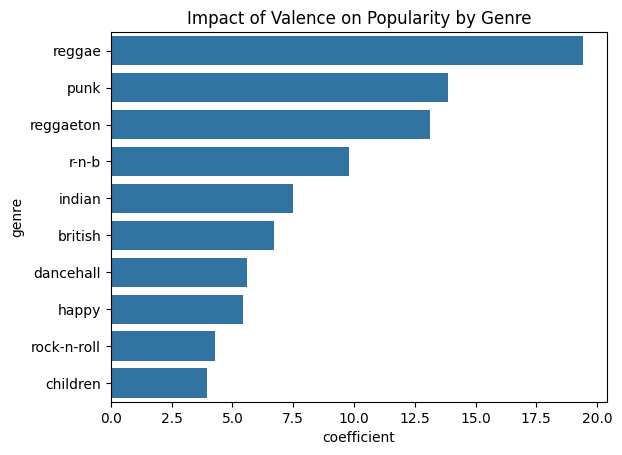

In [209]:
valence_impact = coef_df[coef_df['feature'] == 'valence'].sort_values('coefficient', ascending=False)
sns.barplot(data=valence_impact.head(10), x='coefficient', y='genre')
plt.title("Impact of Valence on Popularity by Genre")

Text(0.5, 1.0, 'Impact of energy on Popularity by Genre')

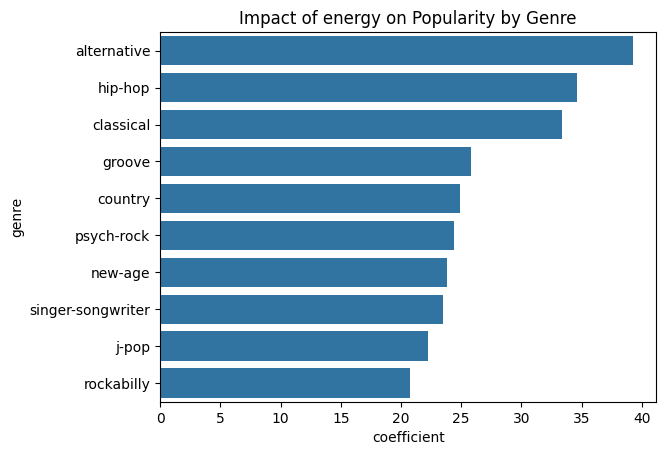

In [210]:
energy_impact = coef_df[coef_df['feature'] == 'energy'].sort_values('coefficient', ascending=False)
sns.barplot(data=energy_impact.head(10), x='coefficient', y='genre')
plt.title("Impact of energy on Popularity by Genre")

Text(0.5, 1.0, 'Impact of danceability on Popularity by Genre')

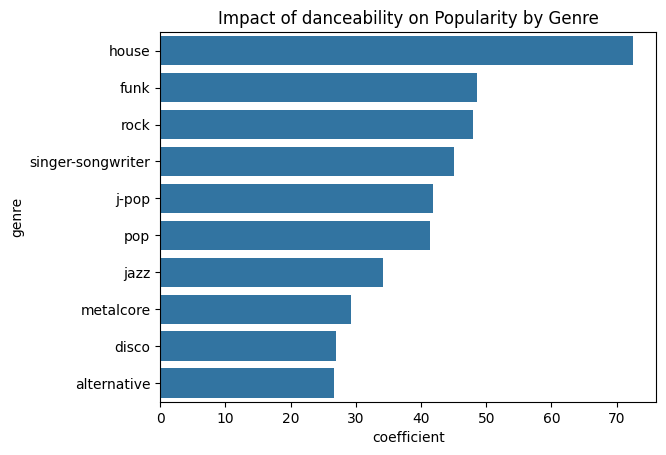

In [211]:
danceability_impact = coef_df[coef_df['feature'] == 'danceability'].sort_values('coefficient', ascending=False)
sns.barplot(data=danceability_impact.head(10), x='coefficient', y='genre')
plt.title("Impact of danceability on Popularity by Genre")